In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import copy
from pylab import rcParams

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 15, 10
warnings.filterwarnings('ignore')

In [65]:
# import and visualise data
parser = lambda dates: pd.datetime.strptime(dates,'%b-%Y')

In [151]:
data = pd.read_excel("Air-passengersdata2.xlsx", index_col = 'Year', date_parser = parser)

In [152]:
data.head()

,#Passengers
Year,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [153]:
def show_plot(
    data,
    figsize=(15, 10),
    color="blue",
    linestyle="-",
    xlabel="Year",
    ylabel="Passengers",
    label=None,
):
    plt.figure(figsize=figsize)
    plt.plot(data.index, data, color=color, label=label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc=2)

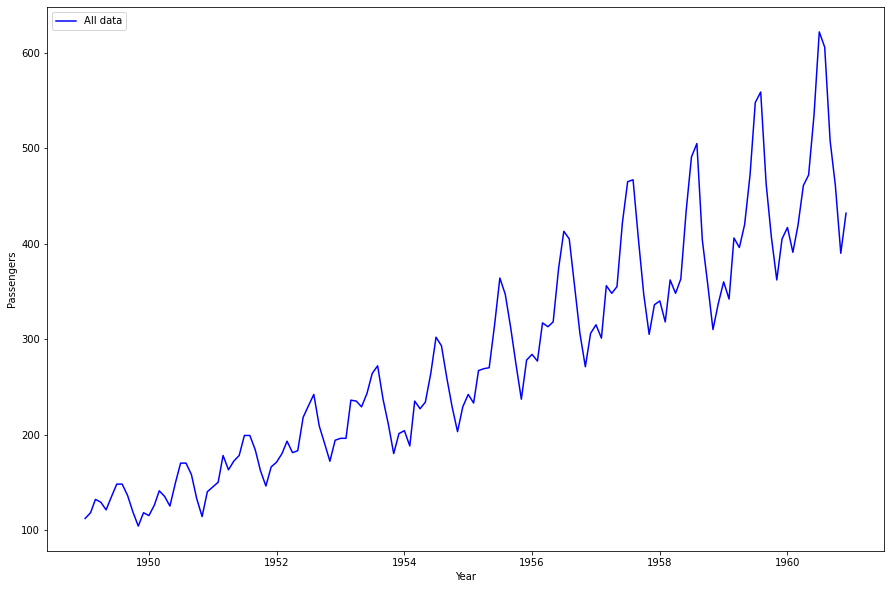

In [154]:
show_plot(data,label = 'All data')

In [155]:
train = data['1949-01-01':'1959-12-01']
test  = data['1960-01-01':]
print('Train Dataset:',train.shape)
print('Test Dataset:',test.shape)

Train Dataset: (132, 1)
Test Dataset: (12, 1)


# cut down samples and train-test split.
def year_cut(data,time):
    '''
    data: df, (n,1), index type must be DatetimeIndex, must be 1 
    time: str,'MMM-YYYY'. Must comply with date form in data.
    '''    
    return data[time:]

def tt_split(data,seperator=0.7):
    '''
    Input:
        data: df, (n,1)
        seperator: float, (0,1). string, 'MMM-YYYY'.
    Output:
        trainin, test: df
    '''
    try:
        n = int(data.shape[0]*seperator)
        return data[:n+1],data[n+1:]
    except:
        return data[:seperator],data[seperator:]


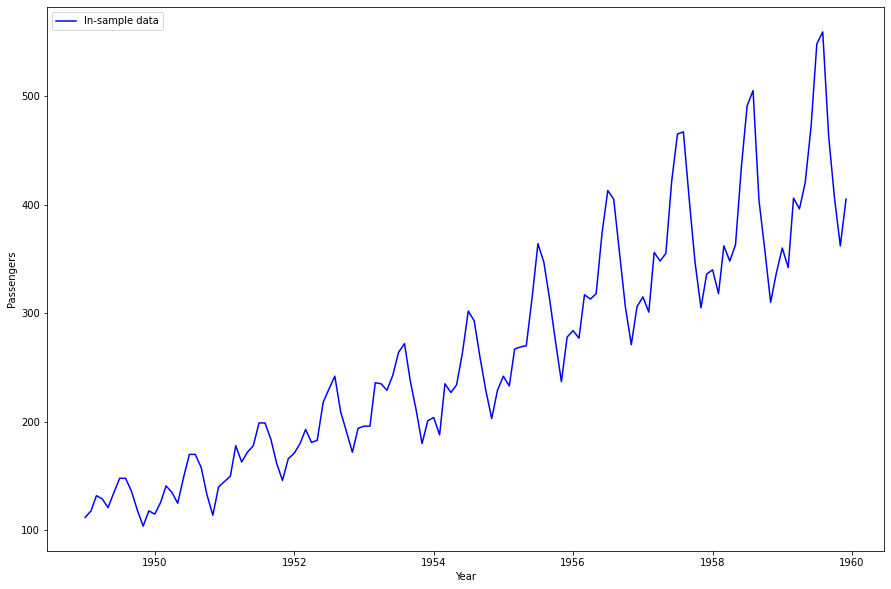

In [156]:
#data_ten_y = year_cut(data,'Jan-1960') # Cut the original data from Jan 2005.
# First 70% data is used as in-sample data, the rest is out-of-sample. 
#rain, test = tt_split(data_ten_y) 
show_plot(train,label = 'In-sample data')


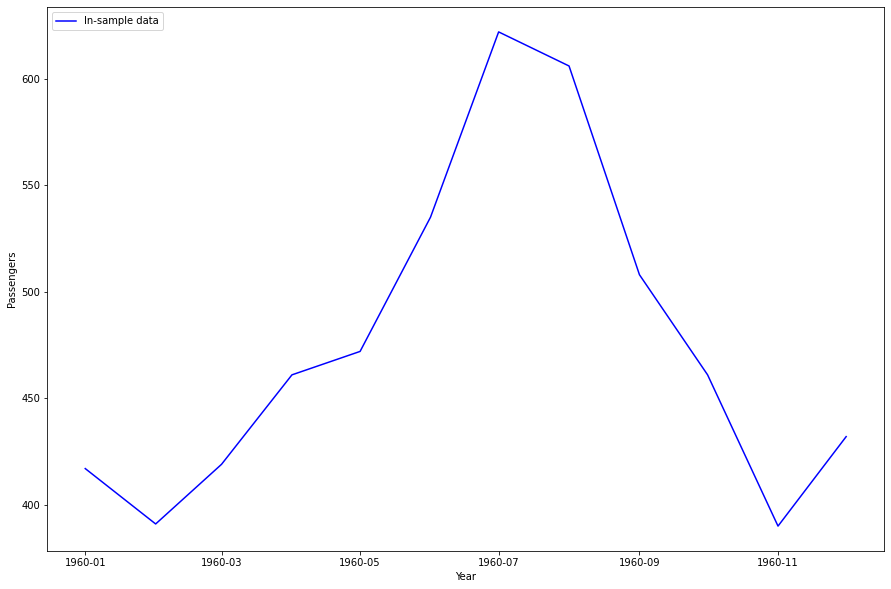

In [157]:
show_plot(test,label = 'In-sample data')

In [158]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [98]:
result = seasonal_decompose(train, model='multiplicative', freq=12)
result2 = seasonal_decompose(train, model='additive', freq=12)

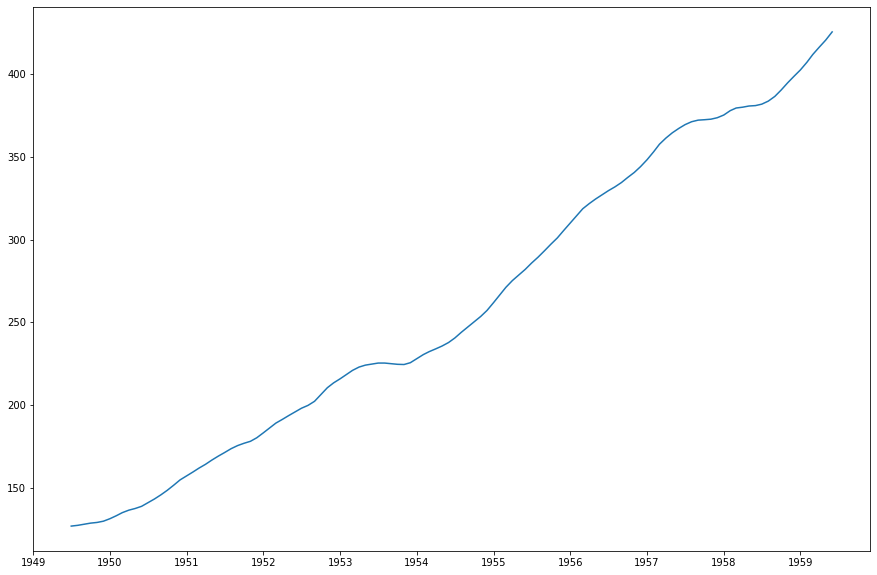

In [159]:
plt.plot(result.trend)

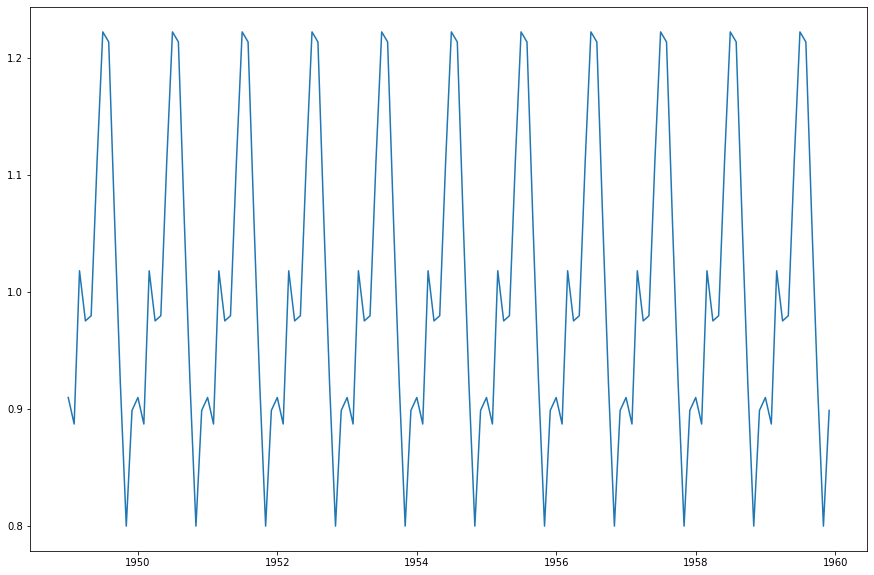

In [111]:
plt.plot(result.seasonal)

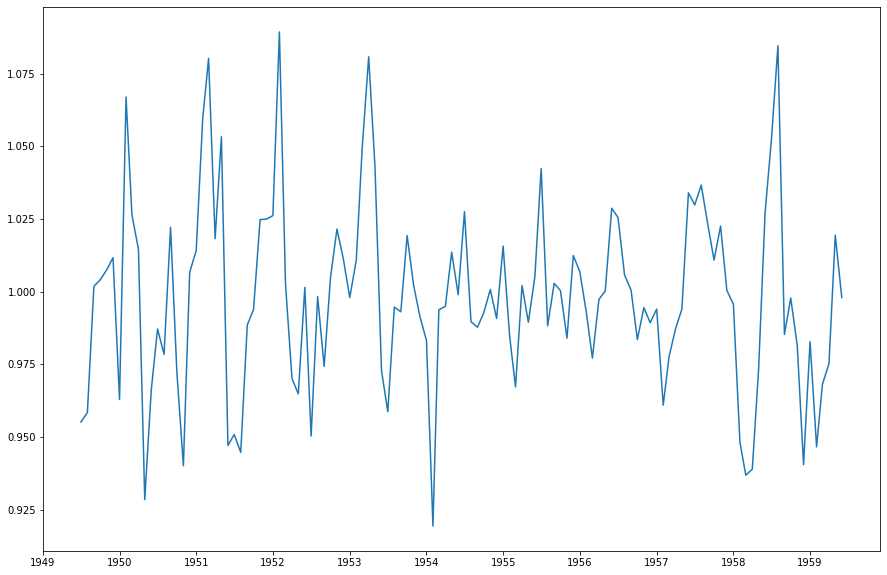

In [114]:
plt.plot(result.resid)

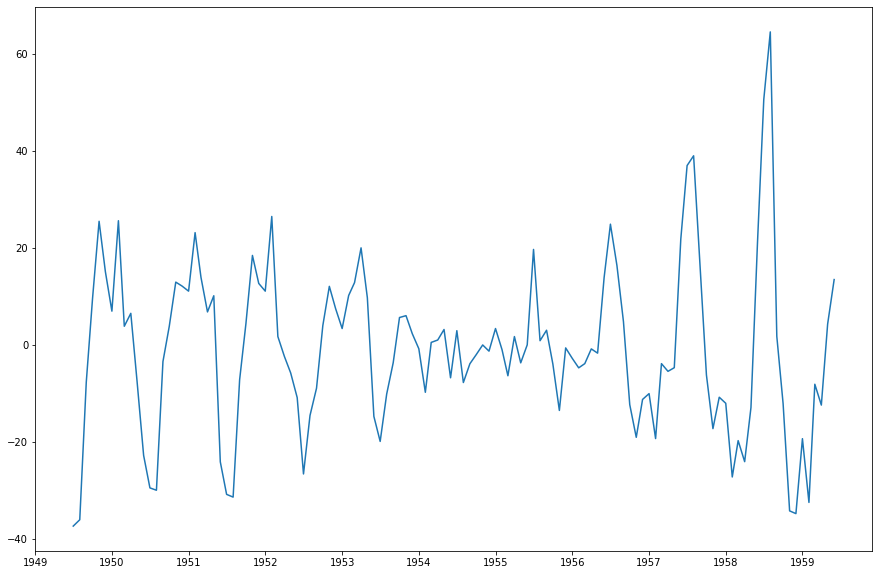

In [115]:
plt.plot(result2.resid)

In [122]:
a =result.seasonal

In [132]:
train

,#Passengers
Year,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1959-08-01,559
1959-09-01,463
1959-10-01,407


In [134]:
merged = pd.merge(train, a, on='Year')

In [135]:
merged.columns

Index(['#Passengers_x', '#Passengers_y'], dtype='object')

In [142]:
merged['de_seasonalised'] = merged['#Passengers_x'] - merged['#Passengers_y']

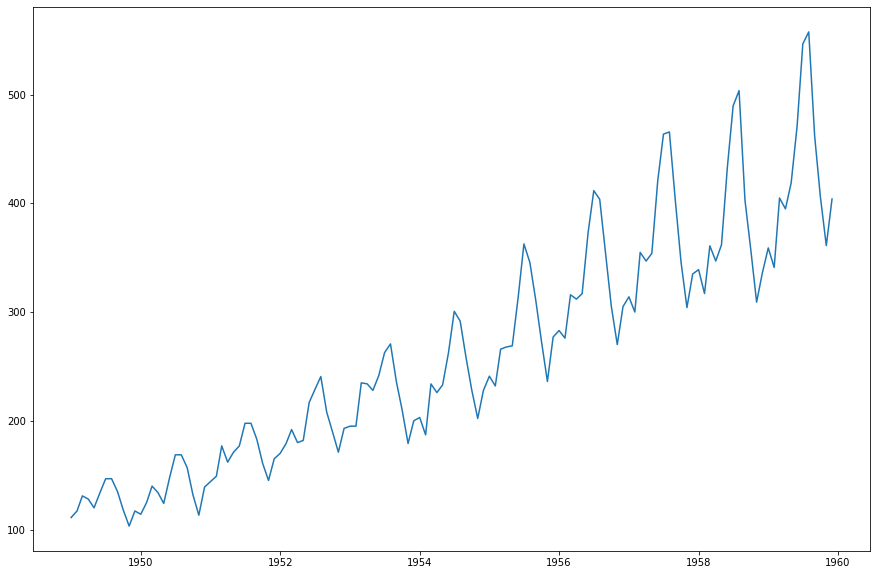

In [143]:
plt.plot(merged['de_seasonalised'])

In [144]:
merged['de_seasonalised'].describe()

count    132.000000
mean     261.492424
std      106.584429
min      103.199787
25%      175.466254
50%      238.493095
75%      342.281069
max      557.786404
Name: de_seasonalised, dtype: float64